In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


# 手書き数字データセットMNISTを読み込む

In [2]:
f = np.load("mnist.npz")
x_train = f['x_train'] / 255.
x_test = f['x_test'] / 255.
x_train = np.reshape(x_train, (len(x_train), np.prod(x_train.shape[1:])))
x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))

# オートエンコーダを構成する

In [3]:
# エンコード後の次元
encoding_dim = 50

# 入力画像は縦横28ピクセル=784次元
input_img   = Input(shape=(784,))
encoded     = Dense(encoding_dim, activation='relu')(input_img)
decoded     = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(loss='mse', optimizer='adam')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               39984     
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


# 手書き数字を学習させる

In [4]:
hist = autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=10,
    validation_split=0.1,
    verbose=1,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s - loss: 0.0282 - val_loss: 0.0126

# 再構築画像の確認

In [5]:
x_pred = autoencoder.predict(x_test)

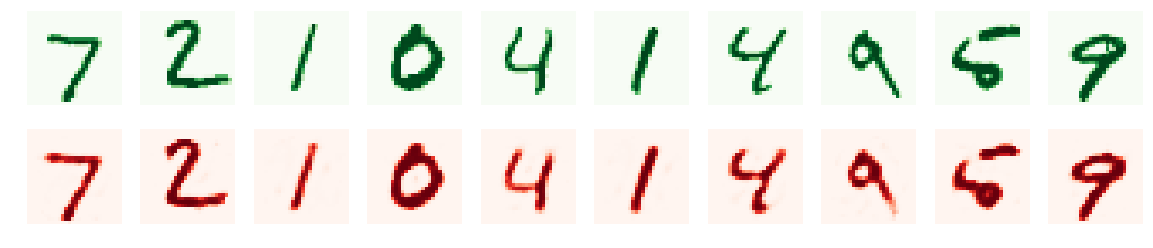

In [18]:
nb_plot = 10
plt.figure(figsize=(20, 4))

for i in range(nb_plot):
    plt.subplot(2,nb_plot,i+1)
#    plt.imshow(x_test[i].reshape(28, 28), 'gray', interpolation='nearest')
    plt.imshow(x_test[i].reshape(28, 28), 'Greens', interpolation='nearest')
    plt.axis('off')

    plt.subplot(2,nb_plot,i+1+nb_plot)
#    plt.imshow(x_pred[i].reshape(28, 28), 'gray', interpolation='nearest')
    plt.imshow(x_pred[i].reshape(28, 28), 'Reds', interpolation='nearest')
    plt.axis('off')
plt.savefig('ae.eps')

(-0.5, 27.5, 27.5, -0.5)

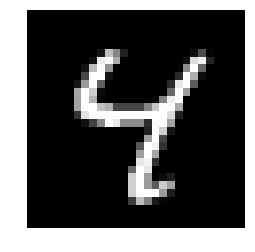

In [21]:
image = x_test[6].reshape(28, 28)
plt.imshow(image, 'gray', interpolation='nearest')
plt.axis('off')

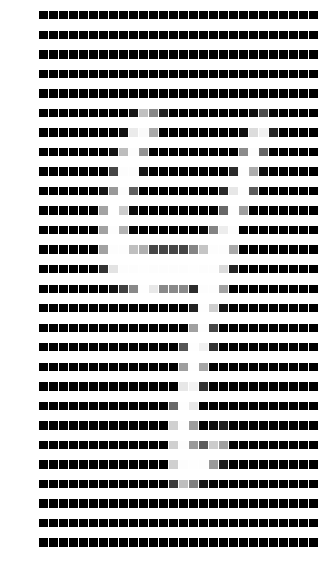

In [44]:
nb = 0
plt.figure(figsize=(5,10))
for m in image:
    for n in m:
        nb += 1
        plt.subplot(len(image),len(image),nb)
        plt.imshow(np.reshape(n,(1,1)), 'gray')
        plt.clim(0,1)
        plt.axis('off')
    #    plt.show()
plt.savefig('4.eps')

# 中間表現のプロット

In [7]:
encoder = Model(input=input_img, output=encoded)

/home/ruho/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [8]:
x_encoded = encoder.predict(x_test)

In [9]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2).fit_transform(x_encoded)

(-9.5486951647679739,
 9.7882562334450434,
 -10.179003666655515,
 9.6598246458113586)

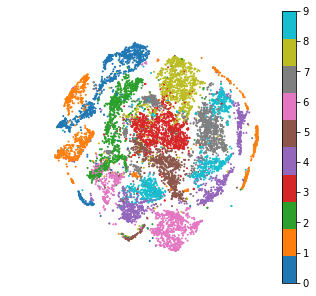

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(x_embedded[:,0], x_embedded[:,1], c=f['y_test'], cmap='tab10', s=1)
plt.axes().set_aspect('equal')
plt.colorbar()
plt.axis('off')